In [1]:
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import cross_val_score

Generation of a random dataset 

In [2]:
X, y  = make_classification(n_samples=500, n_features=2, n_redundant=0, random_state=4)

Plotting the figure

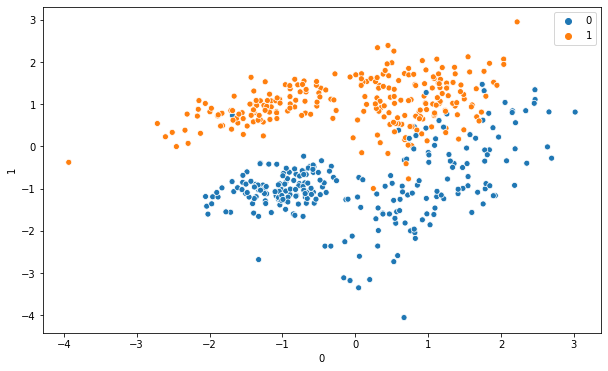

In [3]:
X = pd.DataFrame(X)
y = pd.Series(y)

plt.figure(figsize = (10,6))
sns.scatterplot(X.loc[:, 0], X.loc[:, 1], hue=y) # scatter plot of the two features from X

Working with the linear kernel

In [4]:
clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, X, y, cv = 10, scoring='accuracy').mean() 
print(scores) 

0.9299999999999999


Choosing the best hyperparameter

Text(0, 0.5, 'Cross-Validated Accuracy')

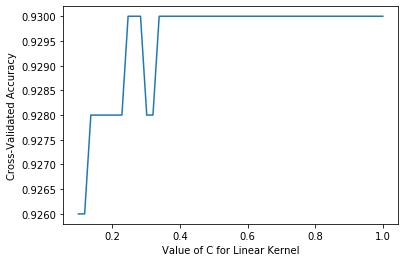

In [5]:
k_scores = [] 
var = np.linspace(0.1, 1, 50)
for i in var:
    clf = svm.SVC(kernel='linear', C = i)
    k_scores.append(cross_val_score(clf, X, y, cv = 10, scoring='accuracy').mean())

sns.lineplot(x = var, y = k_scores)
plt.xlabel('Value of C for Linear Kernel')
plt.ylabel('Cross-Validated Accuracy')

Training the whole dataset with C = 0.5

In [6]:
clf_final = svm.SVC(kernel = 'linear', C = 0.5)
clf_final.fit(X, y)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Plotting the best seperating hyperplane for the linear kernel

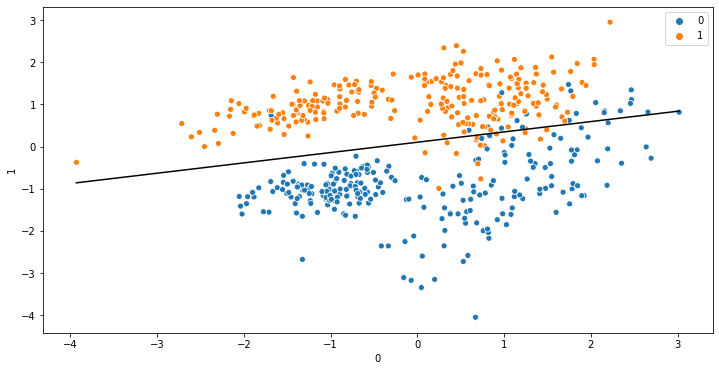

In [7]:
w = clf_final.coef_[0]

a = -w[0] / w[1]
xx = np.linspace(X.loc[:, 0].min(), X.loc[:, 0].max())
yy = a * xx - clf_final.intercept_[0] / w[1]
plt.figure(figsize = (12, 6))
plt.plot(xx, yy, c = 'k')
sns.scatterplot(X.loc[:, 0], X.loc[:, 1], hue = y)

In [8]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Working with the rbf kernel

In [9]:
from sklearn.model_selection import GridSearchCV

Using GridSearchCV to find the best hyper-parameters

In [10]:
C_range = 10. ** np.arange(-3, 4)
gamma_range = 10. ** np.arange(-5, 4)
print(C_range, gamma_range)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03] [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


In [11]:
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVC(), param_grid, cv = 10, scoring='accuracy') # Instantiating the grid

In [12]:
grid.fit(X, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.506,0.009165,"{'C': 0.001, 'gamma': 1e-05}"
1,0.506,0.009165,"{'C': 0.001, 'gamma': 0.0001}"
2,0.506,0.009165,"{'C': 0.001, 'gamma': 0.001}"
3,0.506,0.009165,"{'C': 0.001, 'gamma': 0.01}"
4,0.506,0.009165,"{'C': 0.001, 'gamma': 0.1}"
...,...,...,...
58,0.952,0.022271,"{'C': 1000.0, 'gamma': 0.1}"
59,0.950,0.018439,"{'C': 1000.0, 'gamma': 1.0}"
60,0.920,0.036878,"{'C': 1000.0, 'gamma': 10.0}"
61,0.904,0.044542,"{'C': 1000.0, 'gamma': 100.0}"


In [13]:
print(grid.best_score_)
print(grid.best_params_)

0.954
{'C': 0.1, 'gamma': 1.0}


In [14]:
clf = svm.SVC(C=0.1, gamma=1.0)

In [15]:
clf.fit(X, y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)